In [76]:
# from google.colab import drive 
# drive.mount('/content/drive')

In [77]:
import pandas as pd
import numpy as np
import keras
from matplotlib import pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical 
from keras.callbacks import EarlyStopping 
from sklearn.model_selection import train_test_split

In [78]:
from numpy import genfromtxt
data_train= genfromtxt('data_train.csv', delimiter=',')

In [79]:
data=data_train[:,:-1]
print(data.shape)

(21370, 5)


In [80]:
labels=data_train[:,-1]
labels=labels+1
print(type(labels))

<class 'numpy.ndarray'>


In [81]:
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2)

In [82]:
y_train=to_categorical(y_train,3)

In [83]:
numberLayer=4

In [84]:
model=Sequential()
model.add(Dense(9,input_dim=5,activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [85]:
n_epochs=1000
history=model.fit(x_train,y_train,batch_size=256,epochs=n_epochs,verbose=1,validation_split=0.25,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.000000001)])

Epoch 1/1000
51/51 [==============================] - 1s 7ms/step - loss: 1.0772 - accuracy: 0.4993 - val_loss: 0.9360 - val_accuracy: 0.5042
Epoch 2/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.8637 - accuracy: 0.5748 - val_loss: 0.6895 - val_accuracy: 0.7106
Epoch 3/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.6168 - accuracy: 0.7267 - val_loss: 0.5237 - val_accuracy: 0.7188
Epoch 4/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.5081 - accuracy: 0.7170 - val_loss: 0.4912 - val_accuracy: 0.7223
Epoch 5/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.4704 - accuracy: 0.7311 - val_loss: 0.4740 - val_accuracy: 0.7277
Epoch 6/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.4520 - accuracy: 0.7435 - val_loss: 0.4630 - val_accuracy: 0.7354
Epoch 7/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.4495 - accuracy: 0.7408 - val_loss: 0.4551 - val_accuracy: 0.7323
Epoch 

In [86]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 9)                 54        
_________________________________________________________________
dense_22 (Dense)             (None, 15)                150       
_________________________________________________________________
dense_23 (Dense)             (None, 30)                480       
_________________________________________________________________
dense_24 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_25 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_26 (Dense)             (None, 3)                 33        
Total params: 1,547
Trainable params: 1,547
Non-trainable params: 0
____________________________________________________

In [87]:
# model.save('Model.h5')

In [88]:
x_graph=np.arange(len(history.history['loss']))

In [89]:
prediction=model.predict(x_test)
y_predict=np.argmax(prediction,axis=1)
print(y_predict.shape)
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_predict)

(4274,)


In [90]:
parameter=['accuracy','val_accuracy','loss','val_loss']
image_name=["accuracy for {} layers".format(numberLayer),"loss for {} layers".format(numberLayer)]
name=['Train Accuracy','Validation Accuracy','Train Loss','Validation loss']


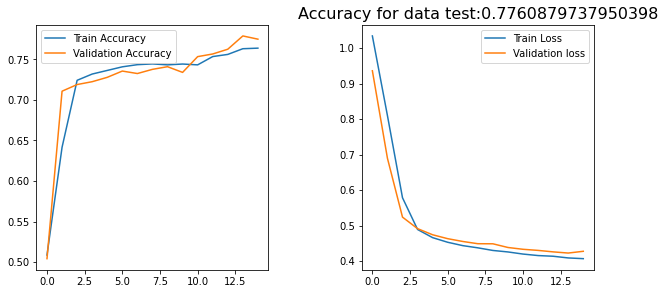

In [91]:
fig=plt.subplots(figsize=(10,5))

for i in range(2):
  plt.subplot(1,2,i+1)
  plt.plot(x_graph,history.history[parameter[2*i]],label=name[2*i])
  plt.plot(x_graph,history.history[parameter[2*i+1]],label=name[2*i+1])
  plt.legend()

plt.title("Accuracy for data test:{}".format(score),fontsize=16)
plt.savefig("{} layers".format(numberLayer))
plt.tight_layout(pad=4.0)
plt.show()